In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [15]:
df = pd.read_csv("../../data/cleaned/movie_meta_cleaned_final5.csv", engine= "python", encoding='utf-8',dtype={'movie_down_sale':'float64','contract_price':'float64','inf_contract_price':'float64'})
# dtype = {'movie_id':'string','title':'string','mpa_rating':'string','src':'string','awards':'string','item_id':'string','studio':'string'
#                         'release_year':'int','release_date','runtime','theater_opening','theater_total','big_awards_num','awards_win_num','awards_nomin_num'})                
# 'movie_id', 'title', 'release_year', 'release_date', 'runtime',
#        'mpa_rating', 'imdb_score', 'legs', 'share', 'inf_income_usa',
#        'theater_opening', 'theater_total', 'src', 'awards', 'poster',
#        'metascore', 'big_awards_num', 'awards_win_num', 'awards_nomin_num',
#        'reviews_users', 'reviews_critics', 'prd_mthd', 'budget', 'series_new',
#        'votes', 'item_id', 'inv_exist', 'contract_year', 'inf', 'genre_action',
#        'genre_adventure', 'genre_drama', 'genre_sci-fi', 'genre_fantasy',
#        'genre_thriller', 'genre_animation', 'genre_family', 'genre_musical',
#        'genre_comedy', 'genre_romance', 'genre_mystery', 'genre_war',
#        'genre_western', 'genre_history', 'genre_sport', 'genre_horror',
#        'genre_crime', 'genre_music', 'genre_biography', 'genre_documentary',
#        'movie_down_sales', 'contract_price_inf', 'net_profit', 'studio',
#        'positive_probability', 'english', 'dvd', 'blu', 'cntry_USA', 'actor_A',
#        'actor_B', 'actor_C', 'director_A', 'director_B', 'director_C',
#        'inf_income_int', 'inf_income_ww', 'inf_budget', 'inf_income_opening',
#        'studio_score', 'price_class', 'contract_price'
# df = pd.read_csv("f500.csv", dtype = {"revenues" : "float64"})

In [3]:
df.head(5)

,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,dvd_sales,blu_sales,total_sales,...,TV-MA,TV-PG,TV-Y7,inf_income_int,inf_income_ww,inf_budget,inf_income_opening,studio_score,price_class,contract_price
0,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011,40683,136,PG-13,6.6,35478573.0,58936309.0,94414882.0,...,0,0,0,9.243261e+08,1.201261e+09,4.353960e+08,1.035667e+08,6,1,650.0
1,tt2395427,Avengers: Age of Ultron,2015,42125,141,PG-13,7.3,33569045.0,55802159.0,89371204.0,...,0,0,0,1.020156e+09,1.516187e+09,3.944425e+08,2.066999e+08,6,1,650.0
2,tt4154756,Avengers: Infinity War,2018,43217,156,PG-13,8.5,23700665.0,77736363.0,101437028.0,...,0,0,0,1.369544e+09,2.048360e+09,3.000000e+08,2.576982e+08,6,10,920.0
3,tt0449088,Pirates of the Caribbean: At World's End,2007,39227,167,PG-13,7.1,314040375.0,7640482.0,321680857.0,...,0,0,0,8.659796e+08,1.275692e+09,3.972384e+08,1.519209e+08,6,1,650.0
4,tt0974015,Justice League,2017,43056,121,PG-13,6.4,19449630.0,40475432.0,59925062.0,...,0,0,0,4.334829e+08,6.660274e+08,3.046112e+08,9.528464e+07,6,1,650.0


In [8]:
df = df.drop(['dvd_sales','blu_sales','total_sales','release_dvd','income_opening','income_usa','income_int','income_ww',
           'dvd_over_income','APPROVED','G','NC-17','NOT RATED','PASSED','PG','PG-13','R','TV-14','TV-G','TV-MA','TV-PG',
           'TV-Y7'],axis=1)

In [9]:
df.columns

Index(['movie_id', 'title', 'release_year', 'release_date', 'runtime',
       'mpa_rating', 'imdb_score', 'legs', 'share', 'inf_income_usa',
       'theater_opening', 'theater_total', 'src', 'awards', 'poster',
       'metascore', 'big_awards_num', 'awards_win_num', 'awards_nomin_num',
       'reviews_users', 'reviews_critics', 'prd_mthd', 'budget', 'series_new',
       'votes', 'item_id', 'inv_exist', 'contract_year', 'inf', 'genre_action',
       'genre_adventure', 'genre_drama', 'genre_sci-fi', 'genre_fantasy',
       'genre_thriller', 'genre_animation', 'genre_family', 'genre_musical',
       'genre_comedy', 'genre_romance', 'genre_mystery', 'genre_war',
       'genre_western', 'genre_history', 'genre_sport', 'genre_horror',
       'genre_crime', 'genre_music', 'genre_biography', 'genre_documentary',
       'movie_down_sales', 'contract_price_inf', 'net_profit', 'studio',
       'positive_probability', 'english', 'dvd', 'blu', 'cntry_USA', 'actor_A',
       'actor_B', 'actor_C', 'd

In [179]:
df_inv = df[df['inv_exist']==1]

In [10]:
for c in df.columns:
    print(c,'결측치 개수:',df[c].isna().sum())

movie_id 결측치 개수: 0
title 결측치 개수: 0
release_year 결측치 개수: 0
release_date 결측치 개수: 0
runtime 결측치 개수: 0
mpa_rating 결측치 개수: 0
imdb_score 결측치 개수: 0
legs 결측치 개수: 0
share 결측치 개수: 0
inf_income_usa 결측치 개수: 0
theater_opening 결측치 개수: 0
theater_total 결측치 개수: 0
src 결측치 개수: 0
awards 결측치 개수: 0
poster 결측치 개수: 0
metascore 결측치 개수: 0
big_awards_num 결측치 개수: 0
awards_win_num 결측치 개수: 0
awards_nomin_num 결측치 개수: 0
reviews_users 결측치 개수: 0
reviews_critics 결측치 개수: 0
prd_mthd 결측치 개수: 0
budget 결측치 개수: 0
series_new 결측치 개수: 0
votes 결측치 개수: 0
item_id 결측치 개수: 0
inv_exist 결측치 개수: 0
contract_year 결측치 개수: 0
inf 결측치 개수: 0
genre_action 결측치 개수: 0
genre_adventure 결측치 개수: 0
genre_drama 결측치 개수: 0
genre_sci-fi 결측치 개수: 0
genre_fantasy 결측치 개수: 0
genre_thriller 결측치 개수: 0
genre_animation 결측치 개수: 0
genre_family 결측치 개수: 0
genre_musical 결측치 개수: 0
genre_comedy 결측치 개수: 0
genre_romance 결측치 개수: 0
genre_mystery 결측치 개수: 0
genre_war 결측치 개수: 0
genre_western 결측치 개수: 0
genre_history 결측치 개수: 0
genre_sport 결측치 개수: 0
genre_horror 결측치 개수: 0
genre_cri

In [11]:
def Nan_to_point():
    global df
    for col in df.columns:
            df.loc[df[col] == '.', col] = np.nan
Nan_to_point()

C:\Users\cresc\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [12]:
for c in df.columns:
    print(c,'결측치 개수:',df[c].isna().sum())

movie_id 결측치 개수: 0
title 결측치 개수: 0
release_year 결측치 개수: 0
release_date 결측치 개수: 0
runtime 결측치 개수: 0
mpa_rating 결측치 개수: 0
imdb_score 결측치 개수: 0
legs 결측치 개수: 0
share 결측치 개수: 0
inf_income_usa 결측치 개수: 0
theater_opening 결측치 개수: 0
theater_total 결측치 개수: 0
src 결측치 개수: 0
awards 결측치 개수: 427
poster 결측치 개수: 2
metascore 결측치 개수: 0
big_awards_num 결측치 개수: 0
awards_win_num 결측치 개수: 0
awards_nomin_num 결측치 개수: 0
reviews_users 결측치 개수: 0
reviews_critics 결측치 개수: 0
prd_mthd 결측치 개수: 0
budget 결측치 개수: 0
series_new 결측치 개수: 0
votes 결측치 개수: 0
item_id 결측치 개수: 4454
inv_exist 결측치 개수: 0
contract_year 결측치 개수: 4454
inf 결측치 개수: 0
genre_action 결측치 개수: 0
genre_adventure 결측치 개수: 0
genre_drama 결측치 개수: 0
genre_sci-fi 결측치 개수: 0
genre_fantasy 결측치 개수: 0
genre_thriller 결측치 개수: 0
genre_animation 결측치 개수: 0
genre_family 결측치 개수: 0
genre_musical 결측치 개수: 0
genre_comedy 결측치 개수: 0
genre_romance 결측치 개수: 0
genre_mystery 결측치 개수: 0
genre_war 결측치 개수: 0
genre_western 결측치 개수: 0
genre_history 결측치 개수: 0
genre_sport 결측치 개수: 0
genre_horror 결측치 개수: 0
g

# 연도별 비교

In [13]:
grd_by_year = df.groupby('release_year').agg('mean')

In [14]:
grd_by_year.loc[:,['runtime','imdb_score','metascore','inf_income_usa','theater_total']]

,runtime,imdb_score,metascore,inf_income_usa,theater_total
release_year,,,,,
1915.0,190.000000,6.400000,68.050204,1.324036e+07,0.000000
1916.0,105.000000,6.200000,57.883698,1.059229e+07,0.000000
1925.0,147.000000,7.850000,73.683077,1.324036e+07,0.000000
1929.0,100.000000,5.700000,63.096673,3.707300e+06,0.000000
1933.0,94.500000,7.650000,85.424724,7.572161e+06,0.000000
...,...,...,...,...,...
2014.0,108.146919,6.387204,53.200289,5.554492e+07,1951.383886
2015.0,110.443878,6.448469,54.808228,5.128988e+07,1942.280612
2016.0,110.972222,6.395833,55.094846,5.492755e+07,2164.407407


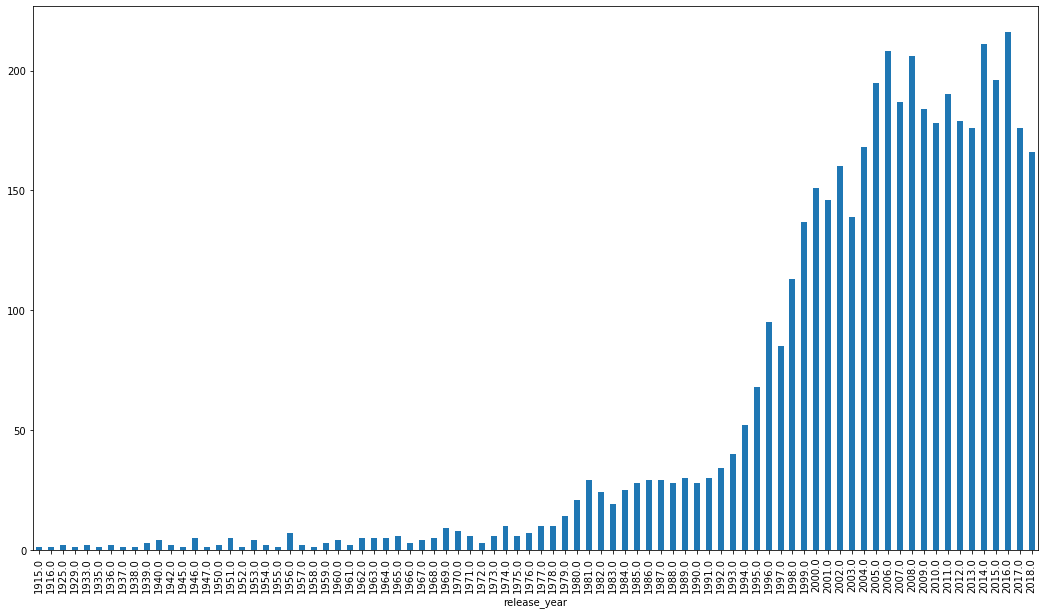

In [122]:
df.groupby('release_year').count()['movie_id'].plot.bar(figsize=(18,10))

## 1) 90년대부터 눈에 띄게 영화 수 증가, 2000년대 후반부터 정체

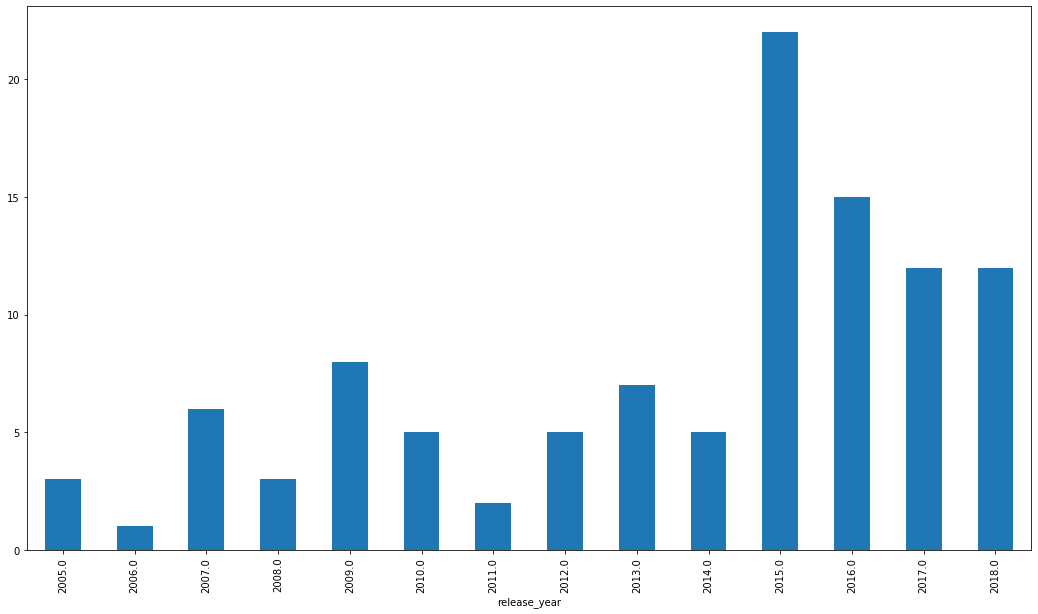

In [125]:
df_inv.groupby('release_year').count()['movie_id'].plot.bar(figsize=(18,10))

## 2) inventory의 경우, 2015년 영화가 가장 많음

### 개봉 영화 개수 100개 이상인 해

In [29]:
grd_movie_num_over100 = grd_by_year_sum.query('movie_id > 100')

In [31]:
grd_movie_num_over100['movie_id']

release_year
1998.0    113
1999.0    137
2000.0    151
2001.0    146
2002.0    160
2003.0    139
2004.0    168
2005.0    195
2006.0    208
2007.0    187
2008.0    206
2009.0    184
2010.0    178
2011.0    190
2012.0    179
2013.0    176
2014.0    211
2015.0    196
2016.0    216
2017.0    176
2018.0    166
Name: movie_id, dtype: int64

In [65]:
 df.groupby('release_year').agg('mean').loc[1998:,['inf_income_usa','runtime','imdb_score','metascore','share','theater_opening','theater_total','big_awards_num','awards_win_num','awards_nomin_num']]

,inf_income_usa,runtime,imdb_score,metascore,share,theater_opening,theater_total,big_awards_num,awards_win_num,awards_nomin_num
release_year,,,,,,,,,,
1998.0,8.826928e+07,109.725664,6.419469,53.631364,78.977513,1742.716814,1897.566372,0.300885,5.628319,15.654867
1999.0,7.913532e+07,109.313869,6.438686,52.385341,73.426868,1755.284672,1866.576642,0.255474,5.620438,16.153285
2000.0,7.735850e+07,106.953642,6.192715,47.398839,66.215815,1847.947020,1990.913907,0.251656,5.682119,17.728477
2001.0,8.286947e+07,105.897260,6.224658,47.993151,67.030930,1980.089041,2091.280822,0.205479,5.924658,18.082192
2002.0,7.543800e+07,105.018750,6.218750,50.890898,65.081198,1811.612500,1968.506250,0.212500,6.487500,20.300000
2003.0,8.034587e+07,107.726619,6.188489,50.328873,61.603765,2027.086331,2131.647482,0.215827,7.187050,22.028777
2004.0,7.525719e+07,107.101190,6.356548,52.040142,63.127713,1955.869048,2109.142857,0.232143,7.303571,21.642857
2005.0,6.090604e+07,107.661538,6.288205,53.931097,59.738661,1828.507692,1951.948718,0.194872,6.779487,20.579487
2006.0,5.873540e+07,106.495192,6.275962,53.563660,60.566989,1868.038462,1956.850962,0.221154,6.610577,18.956731


## 3-1) IMDB스코어, 메타스코어 같은 평점의 평균은 연도별 큰 차이가 없음, 개봉 극장 수 역시 연도별 추세를 파악하기 어려움. share의 경우 2018년 평균이 매우 크게 잡힘

In [74]:
 temp = df.groupby('release_year').agg('mean').loc[1998:,['inf_income_usa','inf_income_ww','inf_income_int','share']]

In [77]:
temp['share_new'] = temp['inf_income_usa'] / temp['inf_income_ww']

In [78]:
temp

,inf_income_usa,inf_income_ww,inf_income_int,share,share_new
release_year,,,,,
1998.0,8.826928e+07,1.520406e+09,1.432136e+09,78.977513,0.058056
1999.0,7.913532e+07,2.498546e+09,2.419411e+09,73.426868,0.031673
2000.0,7.735850e+07,8.001278e+08,7.227693e+08,66.215815,0.096683
2001.0,8.286947e+07,3.756379e+09,3.673510e+09,67.030930,0.022061
2002.0,7.543800e+07,2.394541e+09,2.319103e+09,65.081198,0.031504
2003.0,8.034587e+07,5.760418e+08,4.956959e+08,61.603765,0.139479
2004.0,7.525719e+07,9.852695e+08,9.100123e+08,63.127713,0.076382
2005.0,6.090604e+07,2.500336e+08,1.886855e+08,59.738661,0.243591
2006.0,5.873540e+07,8.409990e+08,7.823036e+08,60.566989,0.069840


In [286]:
df['share_new'] = df['inf_income_usa'] / df['inf_income_ww']

In [287]:
df[df['inf_income_ww'] == 0].loc[:,['inf_income_usa','inf_income_ww','inf_income_int']]

,inf_income_usa,inf_income_ww,inf_income_int
3186,11014.0,0.0,-1.293043e+04
4061,2354261.0,0.0,5.962246e+06


In [290]:
df.groupby('release_year').agg('mean').loc[1998:,['inf_income_usa','inf_income_ww','inf_income_int','share', 'share_new']].round(3)

,inf_income_usa,inf_income_ww,inf_income_int,share,share_new
release_year,,,,,
1998,8.826928e+07,1.520406e+09,1.432136e+09,78.978,0.754
1999,7.913532e+07,2.498546e+09,2.419411e+09,73.427,0.698
2000,7.735850e+07,8.001278e+08,7.227693e+08,66.216,0.629
2001,8.286947e+07,3.756379e+09,3.673510e+09,67.031,0.636
2002,7.543800e+07,2.394541e+09,2.319103e+09,65.081,0.607
2003,8.034587e+07,5.760418e+08,4.956959e+08,61.604,0.602
2004,7.525719e+07,9.852695e+08,9.100123e+08,63.128,0.613
2005,6.090604e+07,2.500336e+08,1.886855e+08,59.739,0.561
2006,5.873540e+07,8.409990e+08,7.823036e+08,60.567,inf


## 3-2) income 관련 데이터가 잘못 들어간 듯. 확인 필요

In [55]:
df.columns

Index(['movie_id', 'title', 'release_year', 'release_date', 'runtime',
       'mpa_rating', 'imdb_score', 'legs', 'share', 'inf_income_usa',
       'theater_opening', 'theater_total', 'src', 'awards', 'poster',
       'metascore', 'big_awards_num', 'awards_win_num', 'awards_nomin_num',
       'reviews_users', 'reviews_critics', 'prd_mthd', 'budget', 'series_new',
       'votes', 'item_id', 'inv_exist', 'contract_year', 'inf', 'genre_action',
       'genre_adventure', 'genre_drama', 'genre_sci-fi', 'genre_fantasy',
       'genre_thriller', 'genre_animation', 'genre_family', 'genre_musical',
       'genre_comedy', 'genre_romance', 'genre_mystery', 'genre_war',
       'genre_western', 'genre_history', 'genre_sport', 'genre_horror',
       'genre_crime', 'genre_music', 'genre_biography', 'genre_documentary',
       'movie_down_sales', 'contract_price_inf', 'net_profit', 'studio',
       'positive_probability', 'english', 'dvd', 'blu', 'cntry_USA', 'actor_A',
       'actor_B', 'actor_C', 'd

In [119]:
a = df.groupby('release_year').agg('mean').loc[1998:,['inf_income_usa']].round()
b = a.merge(df_inv.groupby('release_year').agg('mean').loc[1998:,['inf_income_usa']].round(), how='left',on='release_year')   
b['diff'] = b['inf_income_usa_y'] / b['inf_income_usa_x']
b

,inf_income_usa_x,inf_income_usa_y,diff
release_year,,,
1998.0,88269277.0,NaN,NaN
1999.0,79135321.0,NaN,NaN
2000.0,77358499.0,NaN,NaN
2001.0,82869467.0,NaN,NaN
2002.0,75438003.0,NaN,NaN
2003.0,80345866.0,NaN,NaN
2004.0,75257186.0,NaN,NaN
2005.0,60906040.0,454833977.0,7.467798
2006.0,58735397.0,588764432.0,10.024014


## 4-1) 인벤토리 내 영화의 매출 절대치가 매우 높음

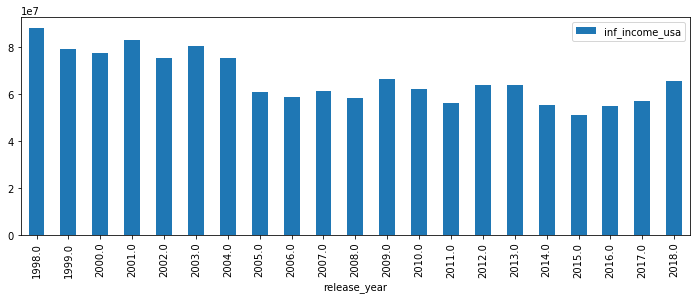

In [59]:
 df.groupby('release_year').agg('mean').loc[1998:,['inf_income_usa']].plot.bar(figsize=(12,4))

## 4-2) 물가상승률을 반영했을 때 연도별 영화 평균 수익은 완만한 감소세

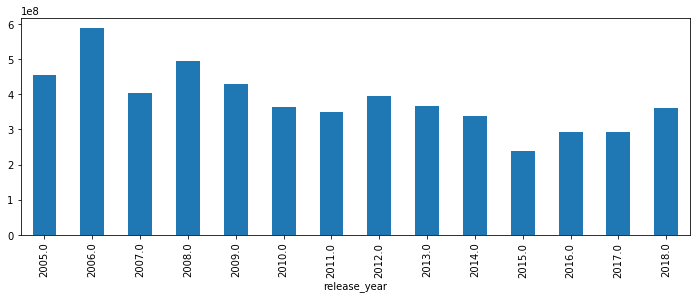

In [63]:
 df_inv.groupby('release_year').agg('mean').loc[:,'inf_income_usa'].plot.bar(figsize=(12,4))

## 4-3) 인벤토리에 있는 영화도 연도별 영화 평균 수익 완만한 감소세. 단 절대치가 메타에 비해 높음. 4~ 10배 차이

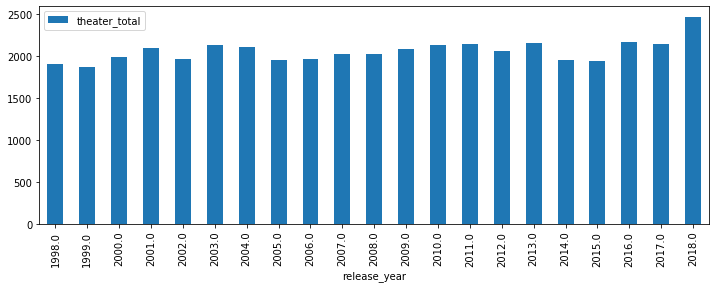

In [68]:
 df.groupby('release_year').agg('mean').loc[1998:,['theater_total']].plot.bar(figsize=(12,4))

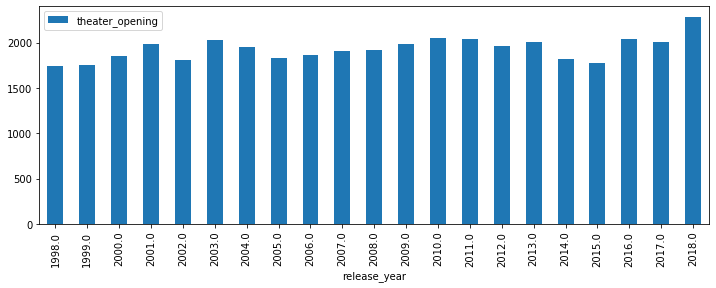

In [69]:
 df.groupby('release_year').agg('mean').loc[1998:,['theater_opening']].plot.bar(figsize=(12,4))

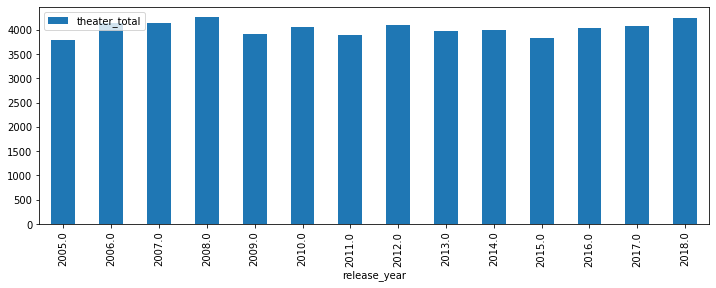

In [70]:
 df_inv.groupby('release_year').agg('mean').loc[1998:,['theater_total']].plot.bar(figsize=(12,4))

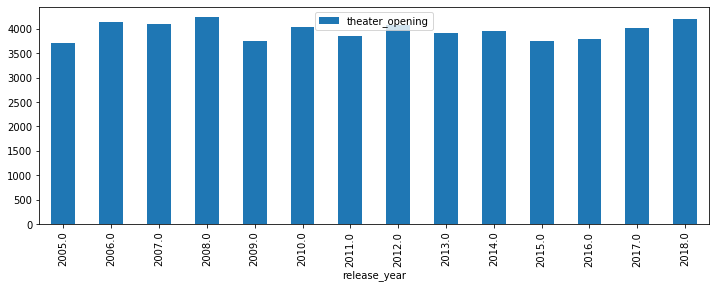

In [71]:
 df_inv.groupby('release_year').agg('mean').loc[1998:,['theater_opening']].plot.bar(figsize=(12,4))

In [88]:
 df.groupby('release_year').agg('mean').loc[1998:,['reviews_users','reviews_critics']]

,reviews_users,reviews_critics
release_year,,
1998.0,346.991150,96.699115
1999.0,440.948905,110.255474
2000.0,361.807947,111.185430
2001.0,453.054795,117.424658
2002.0,395.118750,117.450000
2003.0,433.100719,134.028777
2004.0,458.285714,137.976190
2005.0,447.153846,152.256410
2006.0,393.923077,148.355769


In [101]:
 df_inv.groupby('release_year').agg('mean').loc[1998:,['reviews_users','reviews_critics']]

,reviews_users,reviews_critics
release_year,,
2005.0,2314.333333,329.000000
2006.0,1875.000000,323.000000
2007.0,1372.000000,338.333333
2008.0,3357.333333,473.333333
2009.0,1318.375000,423.500000
2010.0,1242.400000,378.200000
2011.0,673.000000,412.000000
2012.0,1857.800000,712.400000
2013.0,1172.571429,535.428571


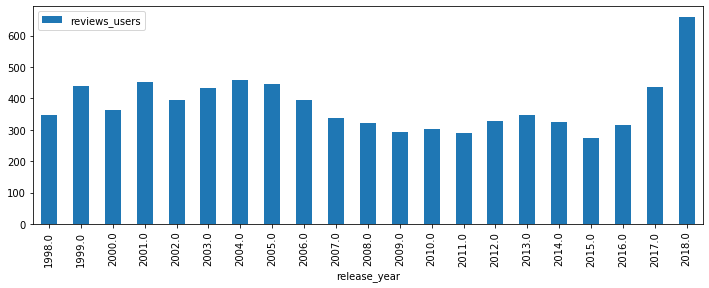

In [89]:
 df.groupby('release_year').agg('mean').loc[1998:,['reviews_users']].plot.bar(figsize=(12,4))

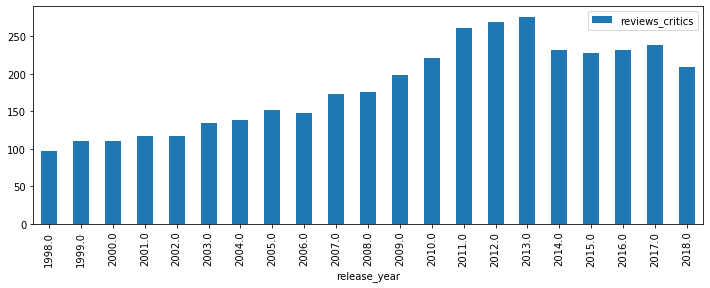

In [90]:
 df.groupby('release_year').agg('mean').loc[1998:,['reviews_critics']].plot.bar(figsize=(12,4))

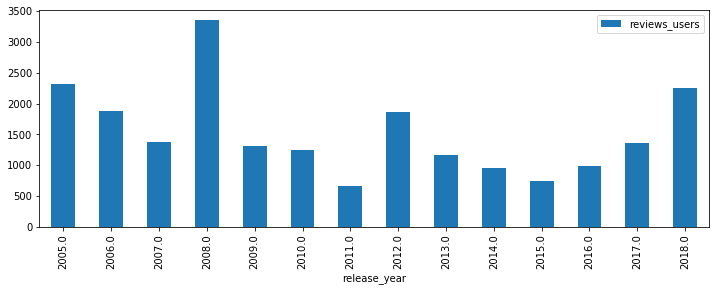

In [91]:
 df_inv.groupby('release_year').agg('mean').loc[1998:,['reviews_users']].plot.bar(figsize=(12,4))

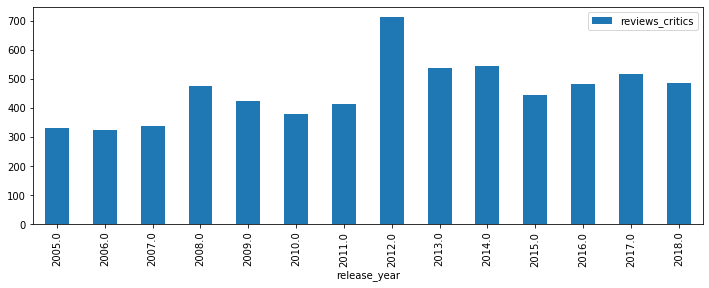

In [92]:
 df_inv.groupby('release_year').agg('mean').loc[1998:,['reviews_critics']].plot.bar(figsize=(12,4))

## 5) 평균 리뷰 수는 시간에 따라 전반적으로 증가세. 다만 inventory 내 영화의 리뷰 숫자가 meta 평균의 2배 이상 -> inventory내 영화는 인기영화일 가능성

In [131]:
# df.groupby('release_year').agg('mean').loc[1998:,['budget']]

a = df.groupby('release_year').agg('mean').loc[1998:,['budget']].round()
b = a.merge(df_inv.groupby('release_year').agg('mean').loc[1998:,['budget']].round(), how='left',on='release_year')   
b['diff'] = b['budget_y'] / b['budget_x']
b

,budget_x,budget_y,diff
release_year,,,
1998.0,37629805.0,NaN,NaN
1999.0,35116511.0,NaN,NaN
2000.0,36068861.0,NaN,NaN
2001.0,37606164.0,NaN,NaN
2002.0,36506798.0,NaN,NaN
2003.0,41292806.0,NaN,NaN
2004.0,40375790.0,NaN,NaN
2005.0,38922290.0,148333333.0,3.811012
2006.0,35966543.0,225000000.0,6.255814


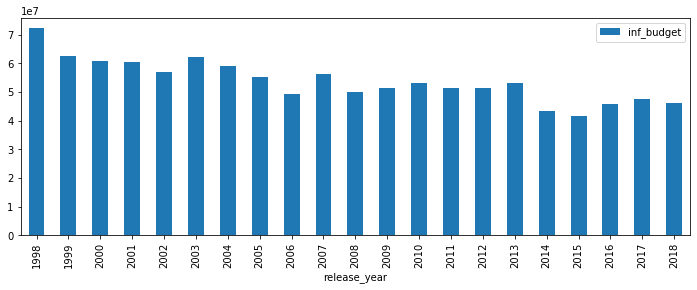

In [184]:
 df.groupby('release_year').agg('mean').loc[1998:,['inf_budget']].plot.bar(figsize=(12,4))

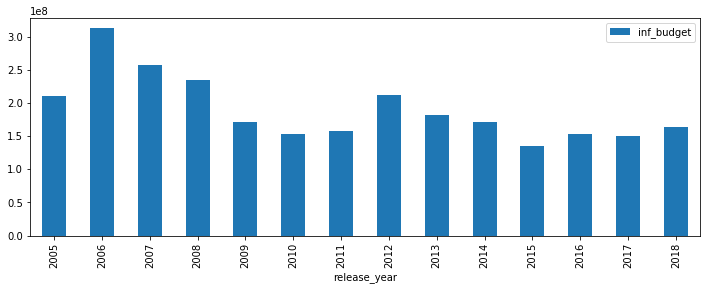

In [185]:
 df_inv.groupby('release_year').agg('mean').loc[1998:,['inf_budget']].plot.bar(figsize=(12,4))

## 6) 예산은 감소 추세...? 역시 연도별로 눈에 띄는 변화를 찾을 순 없으나 inventory 가 3~6배 가량 높음

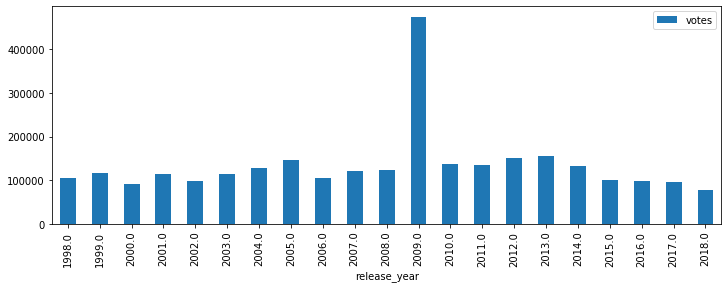

In [138]:
 df.groupby('release_year').agg('mean').loc[1998:,['votes']].plot.bar(figsize=(12,4))

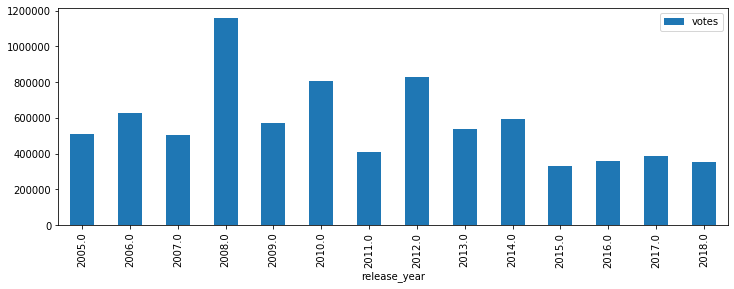

In [141]:
 df_inv.groupby('release_year').agg('mean').loc[1998:,['votes']].plot.bar(figsize=(12,4))

In [140]:
a = df.groupby('release_year').agg('mean').loc[1998:,['votes']].round()
b = a.merge(df_inv.groupby('release_year').agg('mean').loc[1998:,['votes']].round(), how='left',on='release_year')   
b['diff'] = b['votes_y'] / b['votes_x']
b

,votes_x,votes_y,diff
release_year,,,
1998.0,104744.0,NaN,NaN
1999.0,117392.0,NaN,NaN
2000.0,92345.0,NaN,NaN
2001.0,113245.0,NaN,NaN
2002.0,97760.0,NaN,NaN
2003.0,114847.0,NaN,NaN
2004.0,127604.0,NaN,NaN
2005.0,145392.0,511190.0,3.515943
2006.0,105980.0,629595.0,5.940696


## 7) 평가 수 평균도 인벤토리가 압도적으로 높음. 단 meta의 2009년, inv의 2008년은 유난히 평가 수 평균이 높음. 확인할 필요 

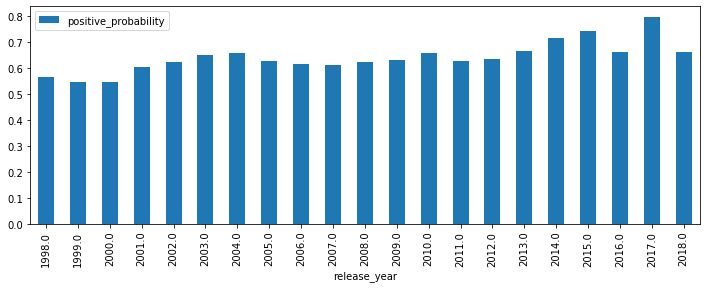

In [168]:
df.groupby('release_year').agg('mean').loc[1998:,['positive_probability']].plot.bar(figsize=(12,4))

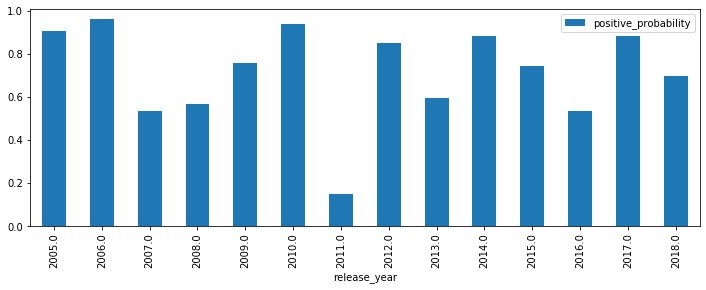

In [169]:
df_inv.groupby('release_year').agg('mean').loc[1998:,['positive_probability']].plot.bar(figsize=(12,4))

### 8) meta의 경우 전반적인 줄거리가 약하게 긍정적으로 변화하는 추세.  그래도 0.6 언저리. inv의 경우 2011년이 특별히 값이 낮고 0.7 정도를 기준으로 분포

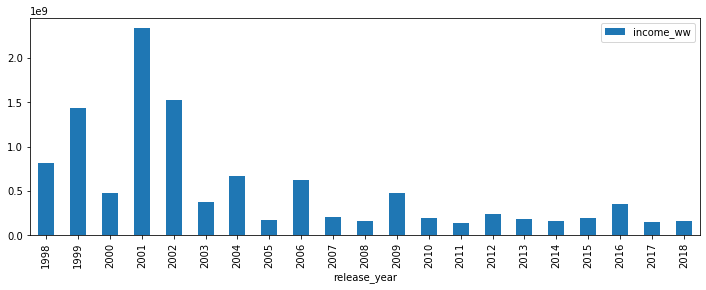

In [30]:
df.groupby('release_year').agg('mean').loc[1998:,['income_ww']].plot.bar(figsize=(12,4))

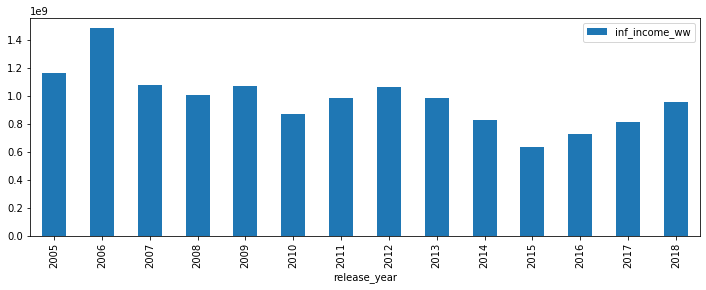

In [187]:
df_inv.groupby('release_year').agg('mean').loc[1998:,['inf_income_ww']].plot.bar(figsize=(12,4))

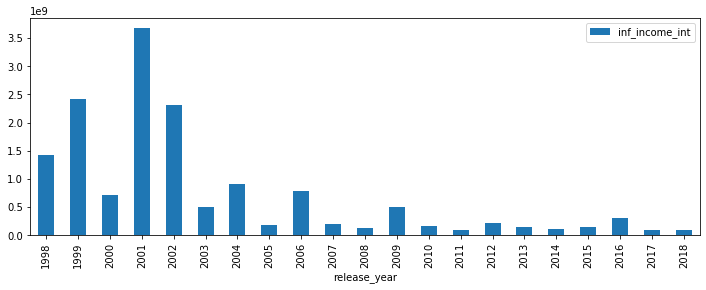

In [188]:
df.groupby('release_year').agg('mean').loc[1998:,['inf_income_int']].plot.bar(figsize=(12,4))

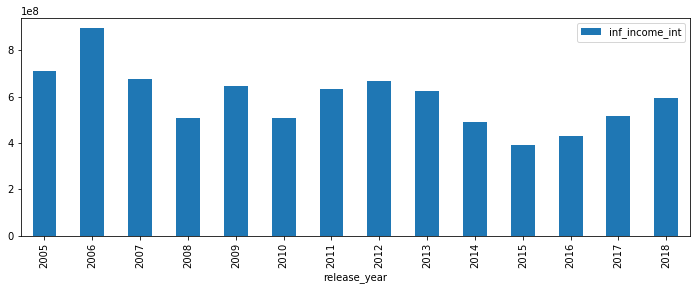

In [196]:
df_inv.groupby('release_year').agg('mean').loc[1998:,['inf_income_int']].plot.bar(figsize=(12,4))

## 9) 2000년대 초반에 매우 높은 세계 매출, 단 inv의 경우 정상적. 확인해볼 필요 있음

C:\Users\cresc\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


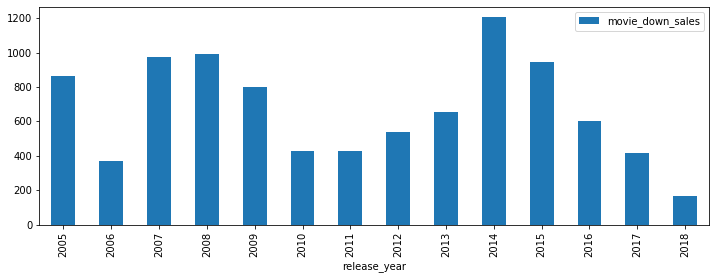

In [197]:
df_inv['movie_down_sales'] = pd.to_numeric(df_inv['movie_down_sales'], errors='coerce')
df_inv.groupby('release_year').agg('mean').loc[1998:,['movie_down_sales']].plot.bar(figsize=(12,4))

## 10) 매출과 연도의 상관성을 찾기 힘들다

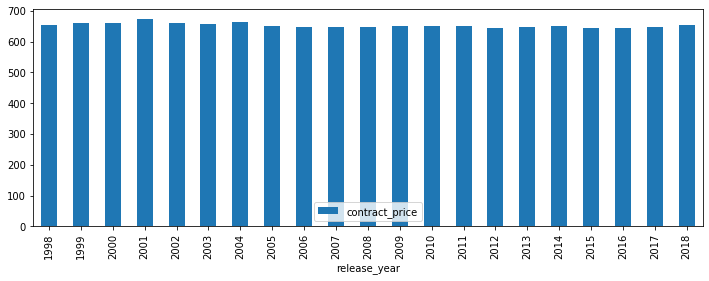

In [200]:
df['contract_price_inf'] = pd.to_numeric(df_inv['contract_price'], errors='coerce')
df.groupby('release_year').agg('mean').loc[1998:,['contract_price']].plot.bar(figsize=(12,4))

C:\Users\cresc\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


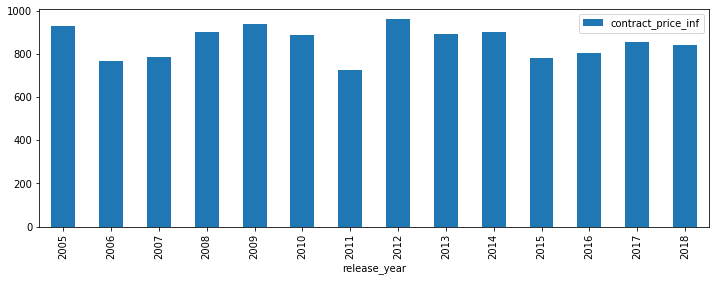

In [198]:
df_inv['contract_price_inf'] = pd.to_numeric(df_inv['contract_price_inf'], errors='coerce')
df_inv.groupby('release_year').agg('mean').loc[1998:,['contract_price_inf']].plot.bar(figsize=(12,4))

## 11) 판권계약금과 연도의 상관성을 찾기 어렵다

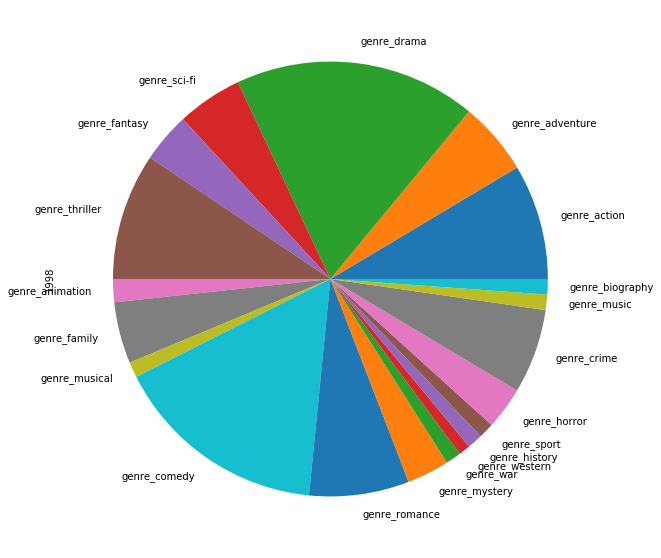

In [221]:
df.groupby('release_year').agg('sum').loc[1998,['genre_action', 'genre_adventure',
       'genre_drama', 'genre_sci-fi', 'genre_fantasy', 'genre_thriller',
       'genre_animation', 'genre_family', 'genre_musical', 'genre_comedy',
       'genre_romance', 'genre_mystery', 'genre_war', 'genre_western',
       'genre_history', 'genre_sport', 'genre_horror', 'genre_crime',
       'genre_music', 'genre_biography', 'genre_documentary']].plot.pie(figsize=(20,10))

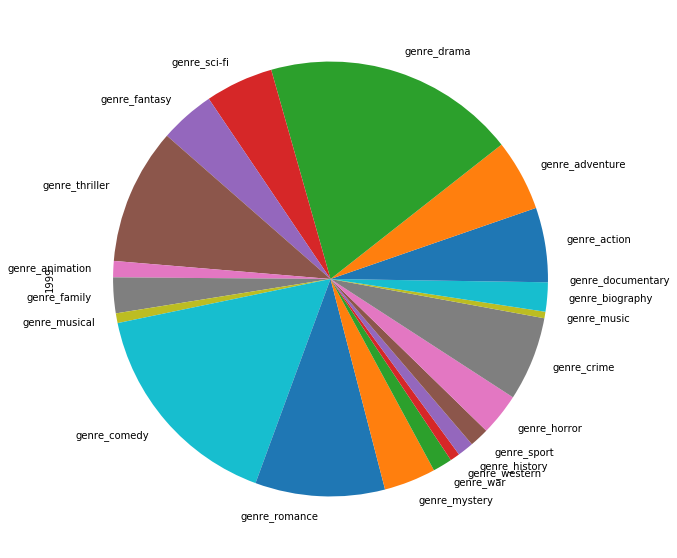

In [224]:
df.groupby('release_year').agg('sum').loc[1999,['genre_action', 'genre_adventure',
       'genre_drama', 'genre_sci-fi', 'genre_fantasy', 'genre_thriller',
       'genre_animation', 'genre_family', 'genre_musical', 'genre_comedy',
       'genre_romance', 'genre_mystery', 'genre_war', 'genre_western',
       'genre_history', 'genre_sport', 'genre_horror', 'genre_crime',
       'genre_music', 'genre_biography', 'genre_documentary']].plot.pie(figsize=(20,10))

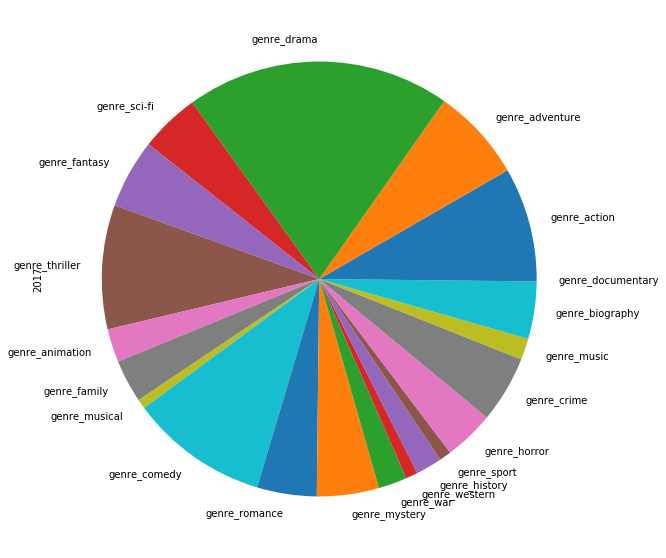

In [223]:
df.groupby('release_year').agg('sum').loc[2017,['genre_action', 'genre_adventure',
       'genre_drama', 'genre_sci-fi', 'genre_fantasy', 'genre_thriller',
       'genre_animation', 'genre_family', 'genre_musical', 'genre_comedy',
       'genre_romance', 'genre_mystery', 'genre_war', 'genre_western',
       'genre_history', 'genre_sport', 'genre_horror', 'genre_crime',
       'genre_music', 'genre_biography', 'genre_documentary']].plot.pie(figsize=(20,10))

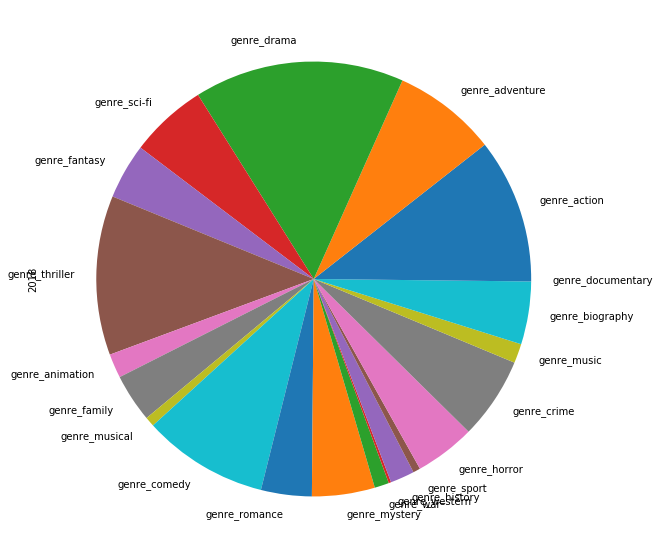

In [222]:
df.groupby('release_year').agg('sum').loc[2018,['genre_action', 'genre_adventure',
       'genre_drama', 'genre_sci-fi', 'genre_fantasy', 'genre_thriller',
       'genre_animation', 'genre_family', 'genre_musical', 'genre_comedy',
       'genre_romance', 'genre_mystery', 'genre_war', 'genre_western',
       'genre_history', 'genre_sport', 'genre_horror', 'genre_crime',
       'genre_music', 'genre_biography', 'genre_documentary']].plot.pie(figsize=(20,10))

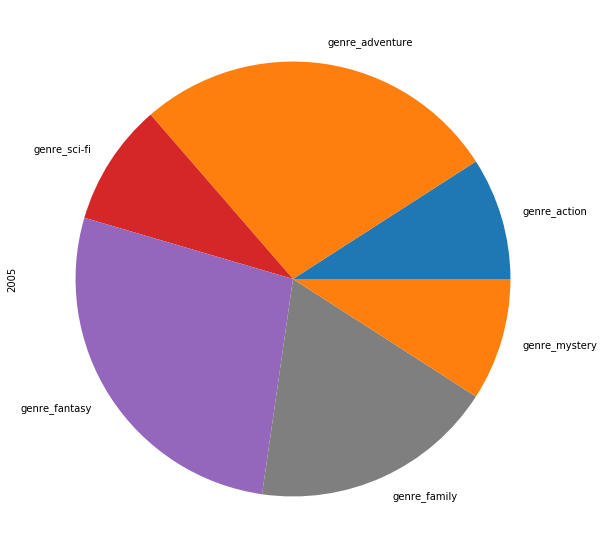

In [231]:
df_inv.groupby('release_year').agg('sum').loc[2005,['genre_action', 'genre_adventure',
       'genre_drama', 'genre_sci-fi', 'genre_fantasy', 'genre_thriller',
       'genre_animation', 'genre_family', 'genre_musical', 'genre_comedy',
       'genre_romance', 'genre_mystery', 'genre_war', 'genre_western',
       'genre_history', 'genre_sport', 'genre_horror', 'genre_crime',
       'genre_music', 'genre_biography', 'genre_documentary']].plot.pie(figsize=(20,10))

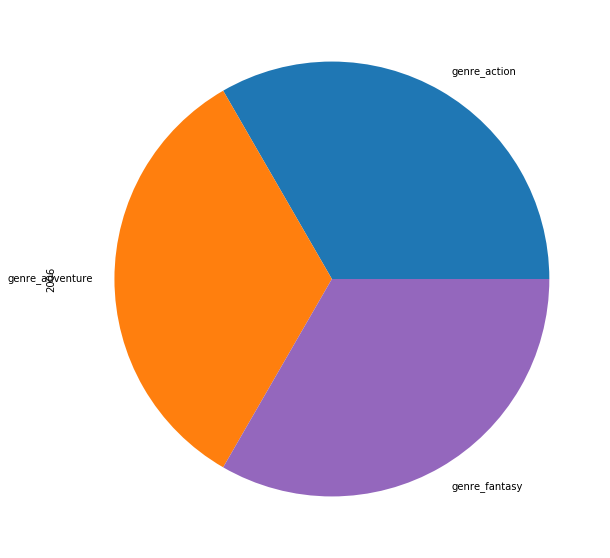

In [232]:
df_inv.groupby('release_year').agg('sum').loc[2006,['genre_action', 'genre_adventure',
       'genre_drama', 'genre_sci-fi', 'genre_fantasy', 'genre_thriller',
       'genre_animation', 'genre_family', 'genre_musical', 'genre_comedy',
       'genre_romance', 'genre_mystery', 'genre_war', 'genre_western',
       'genre_history', 'genre_sport', 'genre_horror', 'genre_crime',
       'genre_music', 'genre_biography', 'genre_documentary']].plot.pie(figsize=(20,10))

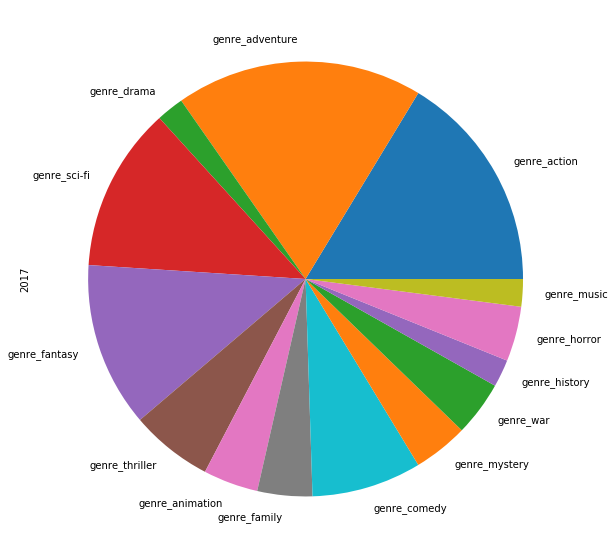

In [233]:
df_inv.groupby('release_year').agg('sum').loc[2017,['genre_action', 'genre_adventure',
       'genre_drama', 'genre_sci-fi', 'genre_fantasy', 'genre_thriller',
       'genre_animation', 'genre_family', 'genre_musical', 'genre_comedy',
       'genre_romance', 'genre_mystery', 'genre_war', 'genre_western',
       'genre_history', 'genre_sport', 'genre_horror', 'genre_crime',
       'genre_music', 'genre_biography', 'genre_documentary']].plot.pie(figsize=(20,10))

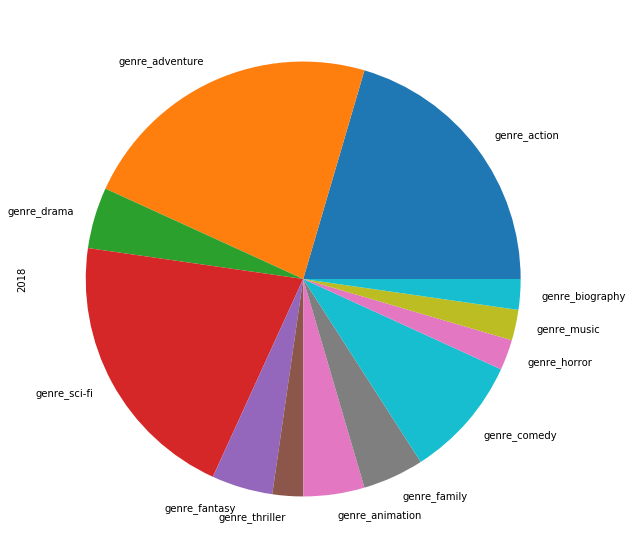

In [230]:
df_inv.groupby('release_year').agg('sum').loc[2018,['genre_action', 'genre_adventure',
       'genre_drama', 'genre_sci-fi', 'genre_fantasy', 'genre_thriller',
       'genre_animation', 'genre_family', 'genre_musical', 'genre_comedy',
       'genre_romance', 'genre_mystery', 'genre_war', 'genre_western',
       'genre_history', 'genre_sport', 'genre_horror', 'genre_crime',
       'genre_music', 'genre_biography', 'genre_documentary']].plot.pie(figsize=(20,10))

## 12) 1998,99년에 비해 2017,2018년에 코미디,로맨스 장르 비중 감소. 미스테리 장르 비중 증가. inv의 경우 메타에 비해 action, adventure, fantasy, sci-if 비중이 훨씬 높음

In [229]:
df.groupby('release_year').agg('sum').loc[1998:,['actor_A', 'actor_B', 'actor_C']]

,actor_A,actor_B,actor_C
release_year,,,
1998,106,114,119
1999,125,143,142
2000,123,149,167
2001,116,172,155
2002,116,148,174
2003,107,144,148
2004,137,161,169
2005,130,195,208
2006,151,184,240


## 13) 배우 다작의 기준이 연도별로 바뀔텐데 그 점을 고려하지 않음. 예를 들어 1998년의 클린트 이스트우드와 2018년의 클린트 이스트우드는 그 위상이 완전히 다를 것. 따라서 다작을 한 배우는 나이가 많을 것이고 최근으로 올수록 이들보단 젋은 배우들이 주연으로 활동할 것

In [234]:
df.groupby('release_year').agg('sum').loc[1998:,['director_A','director_B', 'director_C']]

,director_A,director_B,director_C
release_year,,,
1998,12,19,41
1999,11,31,45
2000,13,26,55
2001,14,23,47
2002,11,29,67
2003,11,25,55
2004,14,26,59
2005,10,44,70
2006,16,30,76


## 14) 감독 또한 배우와 마찬가지

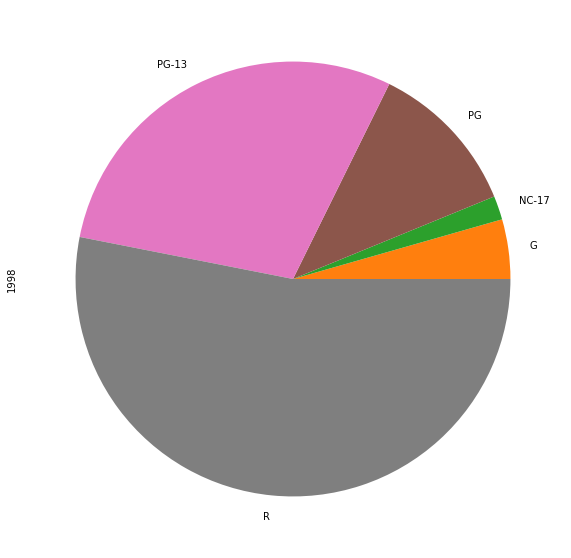

In [238]:
df.groupby('release_year').agg('sum').loc[1998,['APPROVED', 'G', 'NC-17', 'NOT RATED','PASSED', 'PG', 'PG-13', 'R', 'TV-14', 'TV-G', 'TV-MA', 'TV-PG','TV-Y7']].plot.pie(figsize=(20,10))

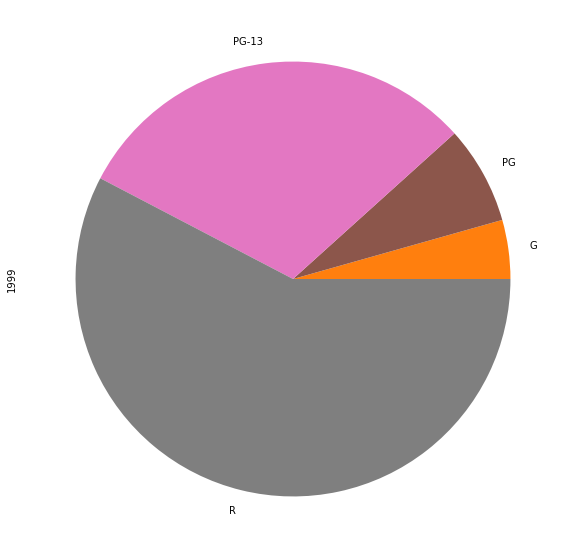

In [241]:
df.groupby('release_year').agg('sum').loc[1999,['APPROVED', 'G', 'NC-17', 'NOT RATED','PASSED', 'PG', 'PG-13', 'R', 'TV-14', 'TV-G', 'TV-MA', 'TV-PG','TV-Y7']].plot.pie(figsize=(20,10))

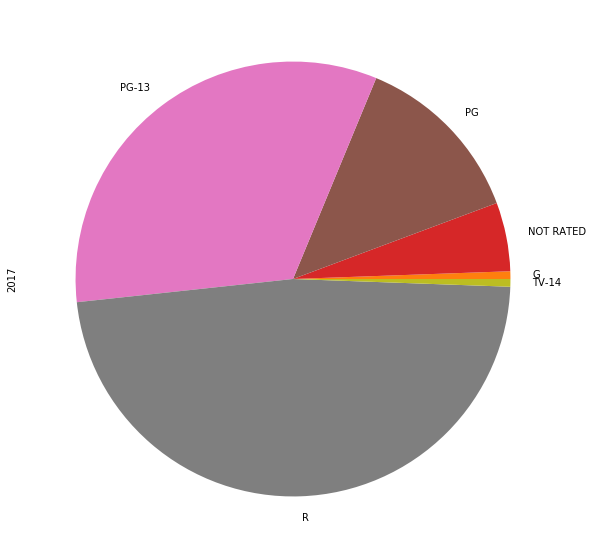

In [240]:
df.groupby('release_year').agg('sum').loc[2017,['APPROVED', 'G', 'NC-17', 'NOT RATED','PASSED', 'PG', 'PG-13', 'R', 'TV-14', 'TV-G', 'TV-MA', 'TV-PG','TV-Y7']].plot.pie(figsize=(20,10))

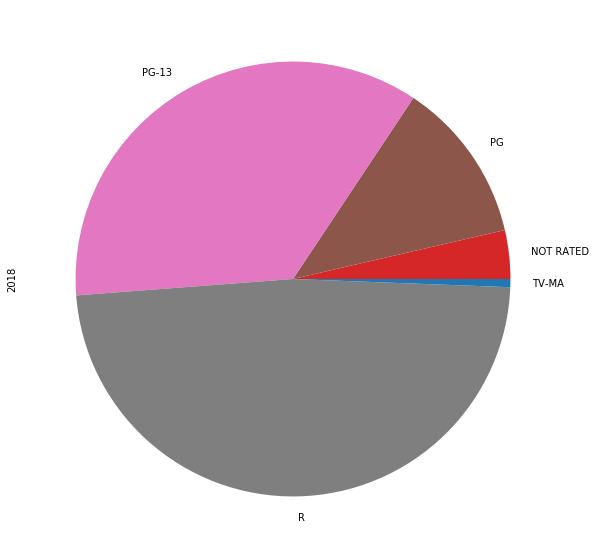

In [239]:
df.groupby('release_year').agg('sum').loc[2018,['APPROVED', 'G', 'NC-17', 'NOT RATED','PASSED', 'PG', 'PG-13', 'R', 'TV-14', 'TV-G', 'TV-MA', 'TV-PG','TV-Y7']].plot.pie(figsize=(20,10))

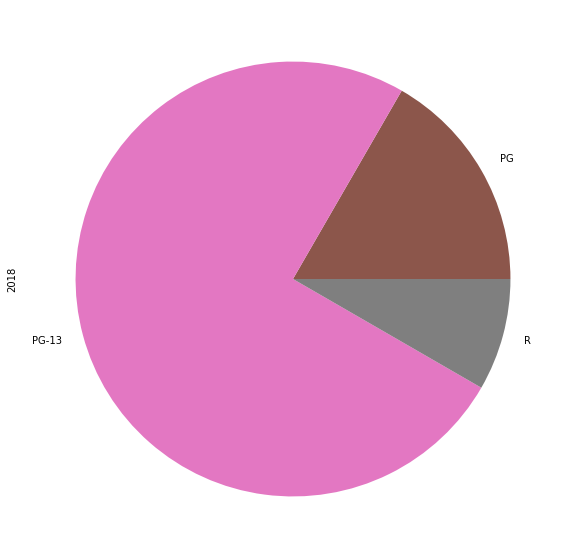

In [291]:
df_inv.groupby('release_year').agg('sum').loc[2018,['APPROVED', 'G', 'NC-17', 'NOT RATED','PASSED', 'PG', 'PG-13', 'R', 'TV-14', 'TV-G', 'TV-MA', 'TV-PG','TV-Y7']].plot.pie(figsize=(20,10))

In [243]:
df.groupby('release_year').agg('sum').loc[1998:,['APPROVED', 'G', 'NC-17', 'NOT RATED','PASSED', 'PG', 'PG-13', 'R', 'TV-14', 'TV-G', 'TV-MA', 'TV-PG','TV-Y7']]

,APPROVED,G,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y7
release_year,,,,,,,,,,,,,
1998,0,5,2,0,0,13,33,60,0,0,0,0,0
1999,0,6,0,0,0,10,42,79,0,0,0,0,0
2000,0,6,0,3,0,17,57,68,0,0,0,0,0
2001,0,4,0,0,0,14,63,65,0,0,0,0,0
2002,0,6,0,1,0,25,65,63,0,0,0,0,0
2003,1,1,0,1,0,19,57,60,0,0,0,0,0
2004,0,2,2,2,0,32,72,58,0,0,0,0,0
2005,0,6,1,3,0,28,78,79,0,0,0,0,0
2006,0,7,2,5,0,38,79,77,0,0,0,0,0


## 15) R등급의 비중이 약간 감소한 것 말고는 연도별 추세를 찾기 어려움

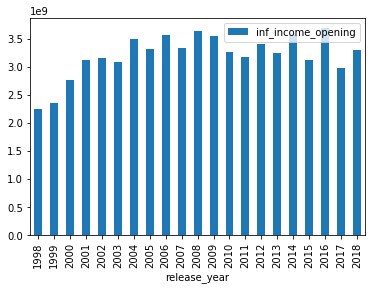

In [245]:
df.groupby('release_year').agg('sum').loc[1998:,['inf_income_opening']].plot.bar()

## 17) 첫주 수익의 유의미한 연도별 차이는 없음

In [250]:
df.groupby('inv_exist').agg('mean').loc[:,['release_year', 'release_date', 'runtime']]

,release_year,release_date,runtime
inv_exist,,,
0,2003.849124,38169.132914,108.938258
1,2013.603774,41706.698113,125.160377


In [251]:
df.groupby('inv_exist').agg('mean').loc[:,['imdb_score', 'metascore']]

,imdb_score,metascore
inv_exist,,
0,6.400022,54.191633
1,7.193396,66.830189


In [292]:
df.groupby('inv_exist').agg('mean').loc[:,['inf_income_usa','inf_income_int', 'inf_income_ww', 'inf_budget',
       'inf_income_opening']].round()

,inf_income_usa,inf_income_int,inf_income_ww,inf_budget,inf_income_opening
inv_exist,,,,,
0,68055434.0,1.349804e+10,1.356603e+10,50045353.0,15729150.0
1,334959123.0,5.301153e+08,8.650744e+08,168993118.0,98958122.0


In [253]:
df.groupby('inv_exist').agg('mean').loc[:,['positive_probability', 'english', 'dvd', 'blu',
       'cntry_USA']]

,positive_probability,english,dvd,blu,cntry_USA
inv_exist,,,,,
0,0.636570,0.979344,0.980916,0.353166,0.919174
1,0.714583,1.000000,1.000000,0.971698,1.000000


In [255]:
df.groupby('inv_exist').agg('mean').loc[:,['genre_action', 'genre_adventure',
       'genre_drama', 'genre_sci-fi', 'genre_fantasy', 'genre_thriller',
       'genre_animation', 'genre_family', 'genre_musical', 'genre_comedy',
       'genre_romance', 'genre_mystery', 'genre_war', 'genre_western',
       'genre_history', 'genre_sport', 'genre_horror', 'genre_crime',
       'genre_music', 'genre_biography']]

,genre_action,genre_adventure,genre_drama,genre_sci-fi,genre_fantasy,genre_thriller,genre_animation,genre_family,genre_musical,genre_comedy,genre_romance,genre_mystery,genre_war,genre_western,genre_history,genre_sport,genre_horror,genre_crime,genre_music,genre_biography
inv_exist,,,,,,,,,,,,,,,,,,,,
0,0.252806,0.191513,0.533229,0.119668,0.126179,0.306017,0.048496,0.115851,0.028738,0.396947,0.235519,0.113381,0.044679,0.020656,0.048720,0.042883,0.107095,0.187023,0.045128,0.081275
1,0.584906,0.764151,0.188679,0.462264,0.330189,0.198113,0.216981,0.273585,0.037736,0.339623,0.037736,0.066038,0.028302,0.009434,0.037736,0.009434,0.037736,0.028302,0.037736,0.056604


In [256]:
df.groupby('inv_exist').agg('mean').loc[:,['APPROVED', 'G', 'NC-17', 'NOT RATED',
       'PASSED', 'PG', 'PG-13', 'R', 'TV-14', 'TV-G', 'TV-MA', 'TV-PG',
       'TV-Y7']]

,APPROVED,G,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y7
inv_exist,,,,,,,,,,,,,
0,0.002919,0.026718,0.004266,0.031432,0.002245,0.153121,0.326897,0.450831,0.000674,0.0,0.000225,0.000449,0.000225
1,0.000000,0.028302,0.000000,0.000000,0.000000,0.216981,0.632075,0.122642,0.000000,0.0,0.000000,0.000000,0.000000


### 18) inv에 있는 영화는 상대적으로 최신, running 타임도 17분 정도 더 길고, imdb - meta score도 높음. 세계적으로 흥행한 영화면서 수익, 극장 개봉 수도 많음. 전부 영어권이며 미국제작 영화. dvd와 bluray 발매 기록이 있음. 줄거리가 더 긍정적임. 액션, 어드벤쳐, SF, 판타지, 애니메이션 장르의 비중은 확실히 높고, 뮤지컬, 코미디, 역사, 음악 장르는 비슷하며, 드라마, 스릴러, 로맨스, 미스터리, 전쟁, 서부, 스포츠, 호러, 범죄, 전기 장르는 확실히 적다. PG-13 등급이 확실히 큰 비중이며, R등급 더 적다. 즉, 청불보다 전체이용가 지향

In [264]:
up = df_inv[df_inv['inf_income_usa']>df_inv['inf_income_usa'].mean()]['movie_down_sales'].mean()
down = df_inv[df_inv['inf_income_usa']<df_inv['inf_income_usa'].mean()]['movie_down_sales'].mean()
print(up,'\n',down)

706.6336758185186 
 636.2845500538463


In [265]:
up = df_inv[df_inv['inf_income_int']>df_inv['inf_income_int'].mean()]['movie_down_sales'].mean()
down = df_inv[df_inv['inf_income_int']<df_inv['inf_income_int'].mean()]['movie_down_sales'].mean()
print(up,'\n',down)

634.3692804387756 
 704.5775500964914


In [270]:
up = df_inv[df_inv['inf_budget']>df_inv['inf_budget'].mean()]['movie_down_sales'].mean()
down = df_inv[df_inv['inf_budget']<df_inv['inf_budget'].mean()]['movie_down_sales'].mean()
print(up,'\n',down)

647.5412676719299 
 700.7176089734694


In [279]:
up = df_inv[df_inv['theater_total']>df_inv['theater_total'].mean()]['movie_down_sales'].mean()
down = df_inv[df_inv['theater_total']<df_inv['theater_total'].mean()]['movie_down_sales'].mean()
print(up,'\n',down)

571.2705178948274 
 793.9859387312503


In [299]:
up = df_inv[df_inv['positive_probability']>df_inv['positive_probability'].mean()]['movie_down_sales'].mean()
down = df_inv[df_inv['positive_probability']<df_inv['positive_probability'].mean()]['movie_down_sales'].mean()
print(up,'\n',down)

655.1487031507043 
 706.555919237143


In [266]:
up = df_inv[df_inv['genre_action']==1]['movie_down_sales'].mean()
down = df_inv[df_inv['genre_action']==0].mean()['movie_down_sales'].mean()
print(up,'\n',down)

654.2192281370967 
 697.3505216477272


In [294]:
up = df_inv[df_inv['genre_animation']==1]['movie_down_sales'].mean()
down = df_inv[df_inv['genre_animation']==0]['movie_down_sales'].mean()
print(up,'\n',down)

630.8879678956522 
 683.5492992216867


In [269]:
up = df_inv[df_inv['genre_adventure']==1]['movie_down_sales'].mean()
down = df_inv[df_inv['genre_adventure']==0].mean()['movie_down_sales'].mean()
print(up,'\n',down)

661.3453658987656 
 707.041618368


In [295]:
up = df_inv[df_inv['genre_fantasy']==1]['movie_down_sales'].mean()
down = df_inv[df_inv['genre_fantasy']==0]['movie_down_sales'].mean()
print(up,'\n',down)

646.1628365228571 
 684.9199411084509


In [296]:
up = df_inv[df_inv['genre_romance']==1]['movie_down_sales'].mean()
down = df_inv[df_inv['genre_romance']==0]['movie_down_sales'].mean()
print(up,'\n',down)

922.54424595 
 662.3023344431375


In [297]:
up = df_inv[df_inv['blu']==1]['movie_down_sales'].mean()
down = df_inv[df_inv['blu']==0]['movie_down_sales'].mean()
print(up,'\n',down)

664.9826787737866 
 917.2663944333332


In [298]:
up = df_inv[df_inv['PG-13']==1]['movie_down_sales'].mean()
down = df_inv[df_inv['PG-13']==0]['movie_down_sales'].mean()
print(up,'\n',down)

629.0858278925373 
 746.0580673897437


In [274]:
up = df_inv[df_inv['R']==1]['movie_down_sales'].mean()
down = df_inv[df_inv['R']==0].mean()['movie_down_sales'].mean()
print(up,'\n',down)

949.3465502692309 
 633.3710746612904


## 19) inv의 특성에 반하는 경우, 매출이 오히려 높음!!

In [257]:
df_inv['inf_income_usa'].mean()

334959122.7924528

In [201]:
df.columns

Index(['movie_id', 'title', 'release_year', 'release_date', 'runtime',
       'mpa_rating', 'imdb_score', 'dvd_sales', 'blu_sales', 'total_sales',
       'legs', 'share', 'inf_income_usa', 'theater_opening', 'theater_total',
       'src', 'awards', 'poster', 'metascore', 'release_dvd', 'big_awards_num',
       'awards_win_num', 'awards_nomin_num', 'reviews_users',
       'reviews_critics', 'prd_mthd', 'budget', 'series_new', 'income_opening',
       'votes', 'income_usa', 'income_int', 'income_ww', 'item_id',
       'inv_exist', 'contract_year', 'inf', 'genre_action', 'genre_adventure',
       'genre_drama', 'genre_sci-fi', 'genre_fantasy', 'genre_thriller',
       'genre_animation', 'genre_family', 'genre_musical', 'genre_comedy',
       'genre_romance', 'genre_mystery', 'genre_war', 'genre_western',
       'genre_history', 'genre_sport', 'genre_horror', 'genre_crime',
       'genre_music', 'genre_biography', 'genre_documentary',
       'dvd_over_income', 'movie_down_sales', 'contract

In [2]:
df_dl = pd.read_csv("../../data/cleaned/movie_download_cleaned.csv", engine= "python", encoding='utf-8')


In [4]:
df_dl.groupby('down_date').count()

,customer_id,item_id,down_year,weekday,inf_year,down_price
down_date,,,,,,
01-01-2014,10,10,10,10,10,10
01-01-2015,24,24,24,24,24,24
01-01-2016,71,71,71,71,71,71
01-01-2017,95,95,95,95,95,95
01-01-2018,35,35,35,35,35,35
...,...,...,...,...,...,...
12-30-2017,71,71,71,71,71,71
12-31-2014,8,8,8,8,8,8
12-31-2015,29,29,29,29,29,29


In [14]:
df_dl['down_month'] = df_dl['down_date'].str[-4:] + '-' + df_dl['down_date'].str[0:2]

In [28]:
for i in df_dl.groupby('down_month')['customer_id'].unique():
    print(len(i))

352
334
346
322
369
334
340
332
291
325
326
298
826
754
763
745
743
727
706
695
629
670
667
644
1057
917
947
980
940
889
960
881
863
900
823
900
1382
1331
1418
1348
1310
1302
1340
1246
1252
1143
1139
1208
1355
1240
1326
1225
1225
1303
1237
1174
1205
1132
1080
1061


In [4]:
df.columns

Index(['movie_id', 'title', 'release_year', 'release_date', 'runtime',
       'mpa_rating', 'imdb_score', 'dvd_sales', 'blu_sales', 'total_sales',
       'legs', 'share', 'inf_income_usa', 'theater_opening', 'theater_total',
       'src', 'awards', 'poster', 'metascore', 'release_dvd', 'big_awards_num',
       'awards_win_num', 'awards_nomin_num', 'reviews_users',
       'reviews_critics', 'prd_mthd', 'budget', 'series_new', 'income_opening',
       'votes', 'income_usa', 'income_int', 'income_ww', 'item_id',
       'inv_exist', 'contract_year', 'inf', 'genre_action', 'genre_adventure',
       'genre_drama', 'genre_sci-fi', 'genre_fantasy', 'genre_thriller',
       'genre_animation', 'genre_family', 'genre_musical', 'genre_comedy',
       'genre_romance', 'genre_mystery', 'genre_war', 'genre_western',
       'genre_history', 'genre_sport', 'genre_horror', 'genre_crime',
       'genre_music', 'genre_biography', 'genre_documentary',
       'dvd_over_income', 'movie_down_sales', 'contract

In [6]:
s = df[df['inv_exist']==1].groupby('contract_year').agg('sum')['contract_price']

In [7]:
s

contract_year
2014.0    35140.0
2015.0    15610.0
2016.0    11370.0
2017.0     9110.0
2018.0     9420.0
Name: contract_price, dtype: float64

In [9]:
s[1]/s[0]

0.4442231075697211

In [10]:
s[2]/(s[0]+s[1])

0.22403940886699508

In [11]:
s[3]/(s[0]+s[1]+s[2])

0.1466516419832582

In [12]:
s[4]/(s[0]+s[1]+s[2]+s[3])

0.13224764846272638

In [13]:
pred = pd.read_csv("../../code/analysis/prediction_inf_down_income/pred_inf_down_price_40_new.csv", engine= "python", encoding='utf-8',dtype={'movie_down_sale':'float64','contract_price':'float64','inf_contract_price':'float64'})
pred

,Unnamed: 0,movie_id,pred_inf_down_income,inf_down_price
0,0,tt1298650,286.897138,NaN
1,1,tt2395427,275.522583,267.208323
2,2,tt4154756,212.573441,161.000000
3,3,tt0449088,204.511795,208.799651
4,4,tt0974015,314.439501,190.180715
...,...,...,...,...
4555,4555,tt6588966,188.421742,NaN
4556,4556,tt5970844,133.231058,NaN
4557,4557,tt5956100,104.343457,NaN
4558,4558,tt5882970,33.362045,NaN


In [17]:
df = df.merge(pred.loc[:,['movie_id','pred_inf_down_income']], on='movie_id',how='left')

In [21]:
df = df[df['inf_income_usa']> 119102928]
df = df[df['inf_budget']> 5077791.003572952]

In [19]:
df[df['inv_exist']==1]['inf_budget'].min()


5077791.003572952

In [23]:
df['ROI'] = df['pred_inf_down_income'] / df['contract_price']

In [27]:
df_sort = df.sort_values(by='ROI', ascending = False)

In [36]:
df_sort['contract_price'][0:55].sum()

34910.0

In [37]:
df_sort

,movie_id,title,release_year,release_date,runtime,mpa_rating,imdb_score,dvd_sales,blu_sales,total_sales,...,TV-Y7,inf_income_int,inf_income_ww,inf_budget,inf_income_opening,studio_score,price_class,contract_price,pred_inf_down_income,ROI
79,tt0293564,Rush Hour 3,2007,39304,91,PG-13,6.2,44763139.0,.,44763139.0,...,0,1.542078e+08,3.397525e+08,2.383430e+08,6.501489e+07,4,1,610.0,505.893850,0.829334
402,tt0266915,Rush Hour 2,2001,37106,90,PG-13,6.6,.,.,.,...,0,1.951754e+08,5.591960e+08,1.448587e+08,1.084963e+08,4,1,610.0,473.859304,0.776819
758,tt0295178,Austin Powers in Goldmember,2002,37463,94,PG-13,6.2,.,.,.,...,0,1.304892e+08,4.646549e+08,9.878313e+07,1.145746e+08,4,1,610.0,460.992371,0.755725
2817,tt0100758,Teenage Mutant Ninja Turtles,1990,32962,93,PG,6.8,949077,54619,1003696,...,0,1.440634e+08,4.360711e+08,2.914336e+07,5.482918e+07,4,1,610.0,442.085404,0.724730
1484,tt0120812,Rush Hour,1998,36056,98,PG-13,7.0,.,.,.,...,0,2.018345e+08,4.755405e+08,6.785127e+07,6.397755e+07,4,1,610.0,432.125482,0.708402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2470,tt0086879,Amadeus,1984,30944,160,R,8.3,.,.,.,...,0,2.458228e+05,1.365074e+08,4.719194e+07,1.324720e+06,4,10,880.0,28.772608,0.032696
1224,tt0106918,The Firm,1993,34150,155,R,6.8,.,.,.,...,0,2.464541e+08,5.948806e+08,9.242029e+07,7.146462e+07,6,1,650.0,18.991263,0.029217
2164,tt0083987,Gandhi,1982,30372,191,PG,8.0,.,.,.,...,0,2.172935e+08,3.701751e+08,6.373944e+07,3.799827e+05,6,10,920.0,22.459364,0.024412
1447,tt1099212,Twilight,2008,39773,121,PG-13,5.2,238166909.0,26733899.0,264900808.0,...,0,2.648947e+08,5.086237e+08,4.678102e+07,8.804661e+07,4,1,610.0,2.397926,0.003931


현재 규모 투자

In [39]:
df_sort['pred_inf_down_income'][0:14].sum() / df_sort['contract_price'][0:14].sum()

0.6885040684137932

In [83]:
# 2019

18594*0.91 + df_sort['contract_price'][0:14].sum()*0.207877

18729.069900000002

In [84]:
# 2020
18594*0.91*0.91 + df_sort['contract_price'][14:28].sum()*0.207877 + df_sort['contract_price'][0:14].sum()*0.207877*0.91

18918.504149

In [85]:
# 2021
18594*0.91*0.91*0.91 + df_sort['contract_price'][28:42].sum()*0.207877 + df_sort['contract_price'][14:28].sum()*0.207877*0.91 + df_sort['contract_price'][0:14].sum()*0.207877*0.91*0.91

19049.313915590003

In [91]:
df_sort['contract_price'][0:14].sum() + df_sort['contract_price'][14:28].sum() + df_sort['contract_price'][28:42].sum()

26540.0

투자 확장

In [40]:
df_sort['pred_inf_down_income'][0:55].sum() / df_sort['contract_price'][0:55].sum()

0.5713934823488971

In [86]:
18594*0.91 + df_sort['contract_price'][0:55].sum()*0.207877

24177.52607

In [87]:
18594*0.91*0.91 + df_sort['contract_price'][0:55].sum()*0.207877*0.91 + df_sort['contract_price'][55:69].sum()*0.207877

23893.229423700002

In [88]:
18594*0.91*0.91*0.91 + df_sort['contract_price'][0:55].sum()*0.207877*0.91*0.91 + df_sort['contract_price'][55:69].sum()*0.207877*0.91 + df_sort['contract_price'][69:83].sum()*0.207877

23638.677015567002

In [81]:
18594 + df_sort['contract_price'][0:55].sum()*0.207877 + df_sort['contract_price'][55:69].sum()*0.207877 + df_sort['contract_price'][69:83].sum()*0.207877

29638.50501

In [90]:
df_sort['contract_price'][0:55].sum() + df_sort['contract_price'][55:69].sum() + df_sort['contract_price'][69:83].sum()

53130.0

In [82]:
18594 + df_sort['contract_price'][0:55].sum()*0.207877 + df_sort['contract_price'][55:69].sum*0.207877 + df_sort['contract_price'][69:83].sum()*0.207877

TypeError: unsupported operand type(s) for *: 'method' and 'float'